In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import sys

Carga y exploracion del dataset ratings

In [46]:
# Cargar reviews (limitado para el taller)
print(" Cargando reviews...")
reviews_df = pd.read_csv('ratings.csv')

# Cargar metadata
print(" Cargando metadata...")

# 1. Leer el archivo csv
metadata_df = pd.read_csv('movies_metadata.csv', low_memory=False)

try:
    # 2. Definir columnas tipo JSON
    json_cols = [
        "genres",
        "production_companies",
        "production_countries",
        "spoken_languages",
        "belongs_to_collection"
    ]

    # 3. Parsear JSON en cada columna

    def parse_column(x, idx, col):
        try:
            if pd.notnull(x):
                return ast.literal_eval(x)
            else:
                return None
        except Exception as e:
            print(f"⚠️ Error en fila {idx}, columna '{col}' → valor = {x}")
            return None

    for col in json_cols:
        metadata_df[col] = [
            parse_column(val, idx, col)
            for idx, val in enumerate(metadata_df[col])
        ]
        
    # 4. Función para extraer solo nombres

    def extract_names(val):
        if isinstance(val, list):
            return [d.get("name") for d in val if isinstance(d, dict)]
        elif isinstance(val, dict):
            return val.get("name")  # en belongs_to_collection a veces es dict
        return None

    metadata_df["genres"] = metadata_df["genres"].apply(extract_names)
    metadata_df["production_companies"] = metadata_df["production_companies"].apply(extract_names)
    metadata_df["production_countries"] = metadata_df["production_countries"].apply(extract_names)
    metadata_df["spoken_languages"] = metadata_df["spoken_languages"].apply(extract_names)
    metadata_df["belongs_to_collection"] = metadata_df["belongs_to_collection"].apply(extract_names)

except Exception as e:
    lineno = sys.exc_info()[2].tb_lineno  # línea donde falló
    print(f"❌ No se pudo terminar de realizar correctamente la lectura. Revisar la línea {lineno} del código. Error: {e}")

# Información básica
print(f"\n INFORMACIÓN DEL DATASET:")
print(f"    Reviews cargadas: {len(reviews_df):,}")
print(f"    Productos con metadata: {len(metadata_df):,}")

if not reviews_df.empty:
    print(f"    Usuarios únicos: {reviews_df['userId'].nunique():,}")
    print(f"    Productos únicos en reviews: {reviews_df['movieId'].nunique():,}")
    if 'rating' in reviews_df.columns:
        print(f"   ⭐ Rating promedio: {reviews_df['rating'].mean():.2f}")

# Explorar estructura de datos
print(f"\n ESTRUCTURA DE DATOS:")
print(" Columnas en reviews:")
print(f"   {list(reviews_df.columns)}")
print("\n Columnas en metadata:")
print(f"   {list(metadata_df.columns)}")

 Cargando reviews...
 Cargando metadata...

 INFORMACIÓN DEL DATASET:
    Reviews cargadas: 26,024,289
    Productos con metadata: 45,466
    Usuarios únicos: 270,896
    Productos únicos en reviews: 45,115
   ⭐ Rating promedio: 3.53

 ESTRUCTURA DE DATOS:
 Columnas en reviews:
   ['userId', 'movieId', 'rating', 'timestamp']

 Columnas en metadata:
   ['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']


In [47]:
reviews_df.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [48]:
metadata_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,45456,45457,45458,45459,45460,45461,45462,45463,45464,45465
adult,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
belongs_to_collection,Toy Story Collection,None,Grumpy Old Men Collection,None,Father of the Bride Collection,None,None,None,None,James Bond Collection,...,None,None,None,None,None,None,None,None,None,None
budget,30000000,65000000,0,16000000,0,60000000,58000000,0,35000000,58000000,...,0,0,0,0,0,0,0,0,0,0
genres,"[Animation, Comedy, Family]","[Adventure, Fantasy, Family]","[Romance, Comedy]","[Comedy, Drama, Romance]",[Comedy],"[Action, Crime, Drama, Thriller]","[Comedy, Romance]","[Action, Adventure, Drama, Family]","[Action, Adventure, Thriller]","[Adventure, Action, Thriller]",...,"[Horror, Mystery, Thriller]","[Mystery, Horror]",[Horror],[Science Fiction],"[Drama, Action, Romance]","[Drama, Family]",[Drama],"[Action, Drama, Thriller]",[],[]
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.mgm.com/view/movie/757/Goldeneye/,...,NaN,NaN,NaN,NaN,NaN,http://www.imdb.com/title/tt6209470/,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862,949,11860,45325,9091,710,...,84419,390959,289923,222848,30840,439050,111109,67758,227506,461257
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041,tt0113277,tt0114319,tt0112302,tt0114576,tt0113189,...,tt0038621,tt0265736,tt0252966,tt0112613,tt0102797,tt6209470,tt2028550,tt0303758,tt0008536,tt6980792
original_language,en,en,en,en,en,en,en,en,en,en,...,en,en,en,en,en,fa,tl,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II,Heat,Sabrina,Tom and Huck,Sudden Death,GoldenEye,...,House of Horrors,Shadow of the Blair Witch,The Burkittsville 7,Caged Heat 3000,Robin Hood,رگ خواب,Siglo ng Pagluluwal,Betrayal,Satana likuyushchiy,Queerama
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...,"Obsessive master thief, Neil McCauley leads a ...",An ugly duckling having undergone a remarkable...,"A mischievous young boy, Tom Sawyer, witnesses...",International action superstar Jean Claude Van...,James Bond must unmask the mysterious head of ...,...,An unsuccessful sculptor saves a madman named ...,"In this true-crime documentary, we delve into ...",A film archivist revisits the story of Rustin ...,It's the year 3000 AD. The world's most danger...,"Yet another version of the classic epic, with ...",Rising and falling between a man and woman.,An artist struggles to finish his work while a...,"When one of her hits goes wrong, a professiona...","In a small town live two brothers, one a minis...",50 years after decriminalisation of homosexual...


In [49]:
print(f"Tamaño de reviews: {len(reviews_df)}")
conteo_nan_reviews = reviews_df.isnull().sum()
print(conteo_nan_reviews)

print(f"\nTamaño de metadata: {len(metadata_df)}")
conteo_nan_metadata = metadata_df.isnull().sum()
print(conteo_nan_metadata)

Tamaño de reviews: 26024289
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Tamaño de metadata: 45466
adult                        0
belongs_to_collection    40975
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         6
production_countries         6
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


In [50]:
print(f"Verificar el tipo de reviews")
print(reviews_df.dtypes)

print(f"Verificar el tipo de metadata")
print(metadata_df.dtypes)

Verificar el tipo de reviews
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object
Verificar el tipo de metadata
adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object


Preparación y limpieza de datos

In [51]:
# Limpieza de datos de reviews
reviews_clean = reviews_df[['userId', 'movieId', 'rating']].copy()
reviews_clean.columns = ['user_id', 'movie_id', "rating"]

# Convertir definitivamente a int
reviews_clean['movie_id'] = reviews_clean['movie_id'].astype(int)
reviews_clean['user_id'] = reviews_clean['user_id'].astype(int)

reviews_clean = reviews_clean.dropna()

print(f"Después de limpieza: {len(reviews_clean)} filas")

Después de limpieza: 26024289 filas


In [52]:
# Limpieza de datos de metadata
useful_cols = ["id", "title", "overview", "genres",]

metadata_clean = metadata_df[useful_cols].copy()
metadata_clean.columns = ['movie_id', "title", "overview", "genres"]

# Intentar convertir a número, los errores se vuelven NaN
metadata_clean['movie_id'] = pd.to_numeric(metadata_clean['movie_id'], errors='coerce')

# Ver cuántos quedaron como NaN
print("IDs inválidos:", metadata_clean['movie_id'].isna().sum())

# Eliminar filas con IDs inválidos
metadata_clean = metadata_clean.dropna(subset=['movie_id'])

# Convertir definitivamente a int
metadata_clean['movie_id'] = metadata_clean['movie_id'].astype(int)

metadata_clean = metadata_clean.dropna()
metadata_clean = metadata_clean.drop_duplicates(['movie_id'])

print(f"Después de limpieza: {len(metadata_clean)} filas")

IDs inválidos: 3
Después de limpieza: 44476 filas


In [53]:
print(f" Datos limpios:")
print(f"    Reviews: {len(reviews_clean):,}")
print(f"    Productos: {len(metadata_clean):,}")

# Análisis de intersección
print(f"\n ANÁLISIS DE INTERSECCIÓN DE DATOS:")
print(f"    IDs únicos en reviews: {reviews_clean['movie_id'].nunique():,}")
print(f"    IDs únicos en metadata: {metadata_clean['movie_id'].nunique():,}")

 Datos limpios:
    Reviews: 26,024,289
    Productos: 44,476

 ANÁLISIS DE INTERSECCIÓN DE DATOS:
    IDs únicos en reviews: 45,115
    IDs únicos en metadata: 44,476


In [54]:
# Verificar intersección
common_items = set(reviews_clean['movie_id']) & set(metadata_clean['movie_id'])
print(f"IDs comunes: {len(common_items):,}")

if len(common_items) == 0:
    print(" NO HAY INTERSECCIÓN - Creando dataset sintético para el tutorial...")
else:
    # Usar datos reales si hay intersección
    reviews_final = reviews_clean[reviews_clean['movie_id'].isin(common_items)]
    metadata_final = metadata_clean[metadata_clean['movie_id'].isin(common_items)]
    print(f" Usando datos reales:")

print(f"    Reviews finales: {len(reviews_final):,}")
print(f"    Peliculas finales: {len(metadata_final):,}")
print(f"    Usuarios únicos: {reviews_final['user_id'].nunique():,}")

IDs comunes: 7,437
 Usando datos reales:
    Reviews finales: 11,395,911
    Peliculas finales: 7,437
    Usuarios únicos: 265,879


Análisis exploratorio

In [55]:
if len(reviews_final) > 0:
    print(" ESTADÍSTICAS GENERALES:")
    print(f"    Rating promedio: {reviews_final['rating'].mean():.2f}")
    print(f"    Mediana de rating: {reviews_final['rating'].median():.1f}")

    # Verificar que hay datos para mode
    mode_values = reviews_final['rating'].mode()
    if len(mode_values) > 0:
        print(f"    Rating más común: {mode_values.iloc[0]}")
    else:
        print(f"    Rating más común: N/A")

    # Análisis de actividad
    user_activity = reviews_final.groupby('user_id').size()
    item_popularity = reviews_final.groupby('movie_id').size()

    print(f"\n ANÁLISIS DE USUARIOS:")
    print(f"    Promedio reviews por usuario: {user_activity.mean():.1f}")
    print(f"    Máximo reviews por usuario: {user_activity.max()}")
    print(f"    Mínimo reviews por usuario: {user_activity.min()}")

    print(f"\n ANÁLISIS DE PELICULAS:")
    print(f"    Promedio reviews por producto: {item_popularity.mean():.1f}")
    print(f"    Producto más popular: {item_popularity.max()} reviews")

 ESTADÍSTICAS GENERALES:
    Rating promedio: 3.53
    Mediana de rating: 4.0
    Rating más común: 4.0

 ANÁLISIS DE USUARIOS:
    Promedio reviews por usuario: 42.9
    Máximo reviews por usuario: 3543
    Mínimo reviews por usuario: 1

 ANÁLISIS DE PELICULAS:
    Promedio reviews por producto: 1532.3
    Producto más popular: 91082 reviews


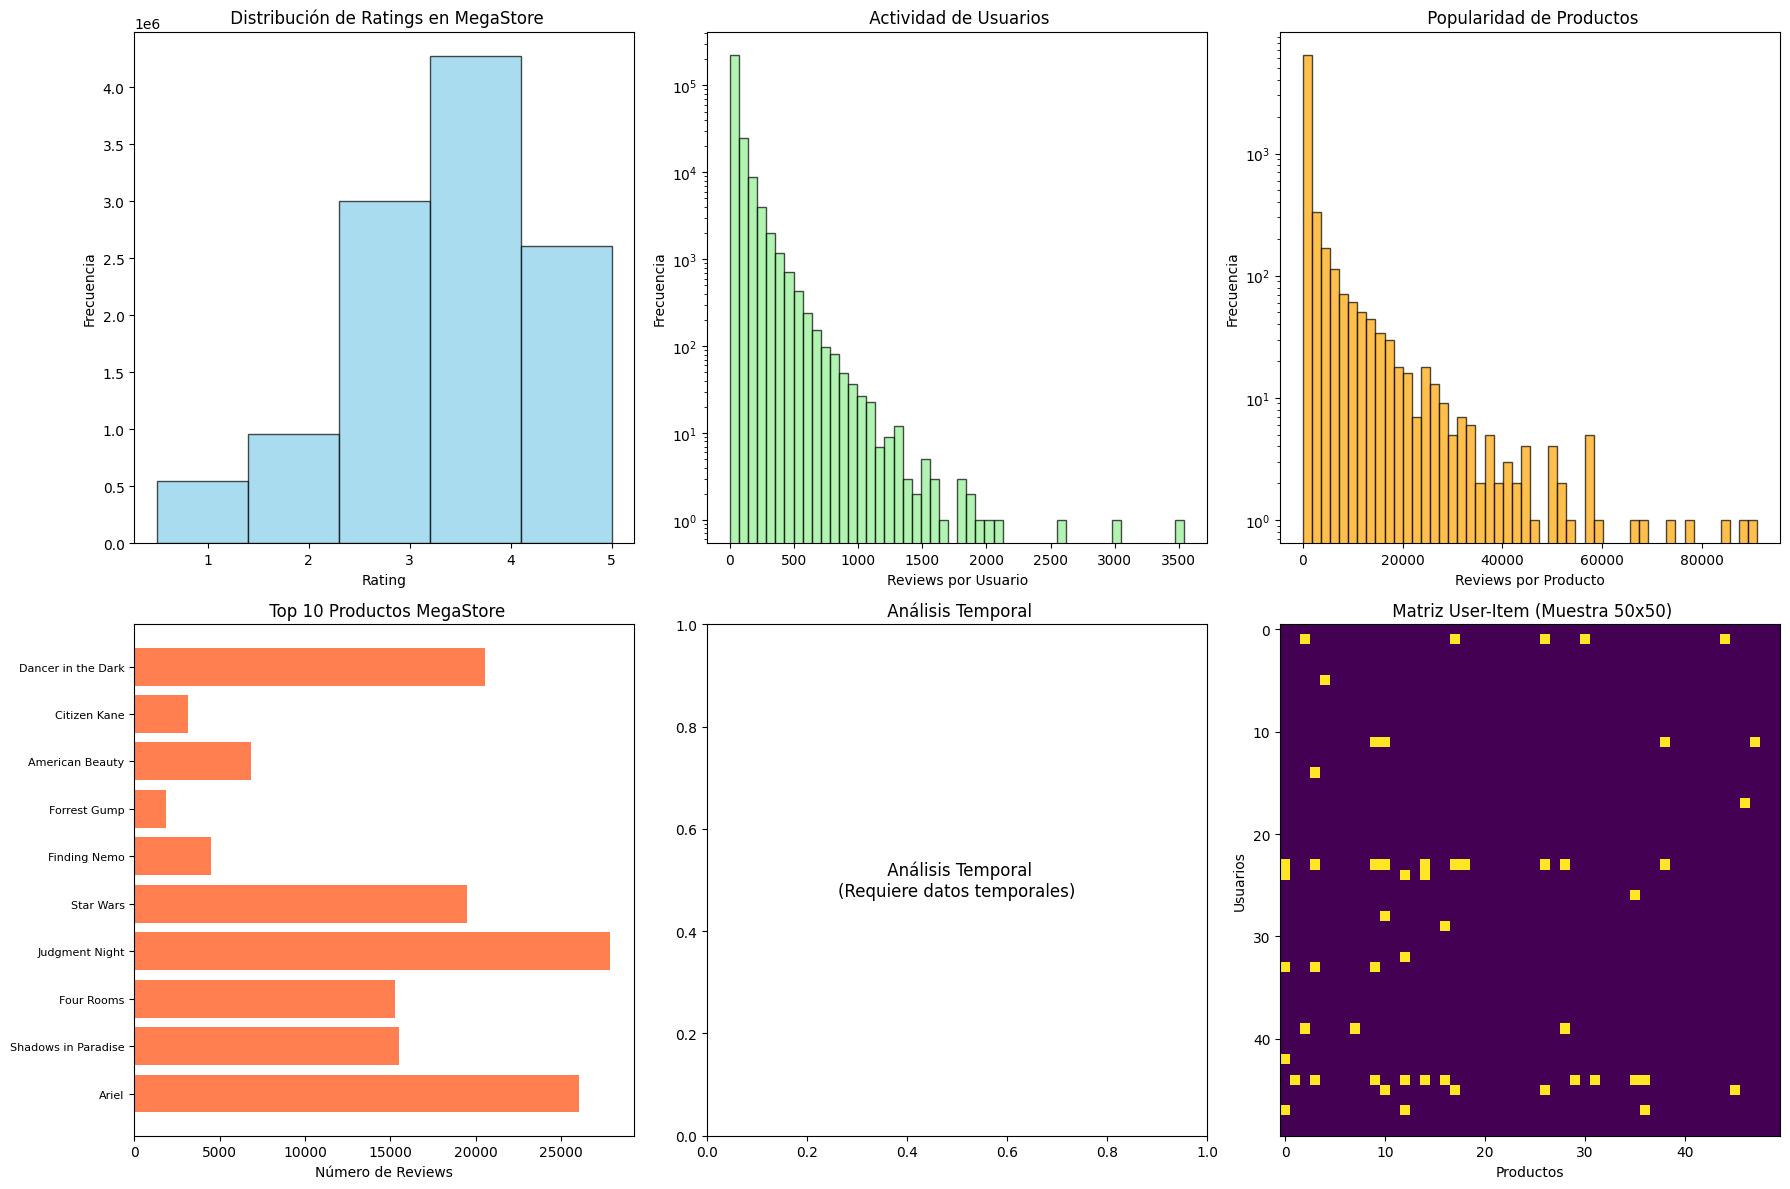

In [56]:
# Visualizaciones
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Distribución de ratings
axes[0,0].hist(reviews_final['rating'], bins=5, edgecolor='black', alpha=0.7, color='skyblue')
axes[0,0].set_title(' Distribución de Ratings en MegaStore')
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Frecuencia')

# Actividad de usuarios
axes[0,1].hist(user_activity, bins=50, edgecolor='black', alpha=0.7, color='lightgreen')
axes[0,1].set_title(' Actividad de Usuarios')
axes[0,1].set_xlabel('Reviews por Usuario')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].set_yscale('log')

# Popularidad de productos
axes[0,2].hist(item_popularity, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0,2].set_title(' Popularidad de Productos')
axes[0,2].set_xlabel('Reviews por Producto')
axes[0,2].set_ylabel('Frecuencia')
axes[0,2].set_yscale('log')

# Top 10 productos más populares
top_items = item_popularity.head(10)
product_names = []
for item_id in top_items.index:
    title = metadata_final[metadata_final['movie_id'] == item_id]['title']
    if not title.empty:
        name = title.iloc[0][:25] + '...' if len(title.iloc[0]) > 25 else title.iloc[0]
    else:
        name = f"Producto {item_id[:8]}"
    product_names.append(name)

axes[1,0].barh(range(len(product_names)), top_items.values, color='coral')
axes[1,0].set_yticks(range(len(product_names)))
axes[1,0].set_yticklabels(product_names, fontsize=8)
axes[1,0].set_title(' Top 10 Productos MegaStore')
axes[1,0].set_xlabel('Número de Reviews')

# Distribución temporal (si hay timestamp)
axes[1,1].text(0.5, 0.5, ' Análisis Temporal\n(Requiere datos temporales)',
               ha='center', va='center', transform=axes[1,1].transAxes, fontsize=12)
axes[1,1].set_title(' Análisis Temporal')

# Matriz de sparsity (muestra)
sample_matrix = reviews_final.pivot_table(
    index='user_id', columns='movie_id', values='rating', fill_value=0
).iloc[:50, :50]
axes[1,2].imshow(sample_matrix > 0, cmap='viridis', aspect='auto')
axes[1,2].set_title(' Matriz User-Item (Muestra 50x50)')
axes[1,2].set_xlabel('Productos')
axes[1,2].set_ylabel('Usuarios')

plt.tight_layout()
plt.show()

In [57]:
# Calcular sparsity (con validación)
if len(reviews_final) > 0:
    total_users = reviews_final['user_id'].nunique()
    total_items = reviews_final['movie_id'].nunique()
    total_ratings = len(reviews_final)
    possible_ratings = total_users * total_items
    sparsity = (1 - total_ratings / possible_ratings) * 100 if possible_ratings > 0 else 0

    print(f"\n ANÁLISIS DE SPARSITY:")
    print(f"    Total posibles ratings: {possible_ratings:,}")
    print(f"    Ratings existentes: {total_ratings:,}")
    print(f"    Sparsity: {sparsity:.2f}%")
else:
    sparsity = 99.0  # Valor por defecto
    print(f"\n Sin datos suficientes para calcular sparsity")


 ANÁLISIS DE SPARSITY:
    Total posibles ratings: 1,977,342,123
    Ratings existentes: 11,395,911
    Sparsity: 99.42%


In [58]:
reviews_final.info()
reviews_final.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 11395911 entries, 0 to 26024284
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   movie_id  int64  
 2   rating    float64
dtypes: float64(1), int64(2)
memory usage: 347.8 MB


,user_id,movie_id,rating
count,1.139591e+07,1.139591e+07,1.139591e+07
mean,1.351175e+05,7.029258e+03,3.532361e+00
std,7.812321e+04,1.809651e+04,1.066995e+00
min,1.000000e+00,2.000000e+00,5.000000e-01
25%,6.739800e+04,4.970000e+02,3.000000e+00
50%,1.354180e+05,1.407000e+03,4.000000e+00
75%,2.026930e+05,3.033000e+03,4.000000e+00
max,2.708960e+05,1.762730e+05,5.000000e+00


In [59]:
metadata_final.info()
metadata_final.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 7437 entries, 0 to 45462
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  7437 non-null   int64 
 1   title     7437 non-null   object
 2   overview  7437 non-null   object
 3   genres    7437 non-null   object
dtypes: int64(1), object(3)
memory usage: 290.5+ KB


,movie_id,title,overview,genres
count,7437.000000,7437,7437,7437
unique,NaN,7282,7396,1382
top,NaN,Frankenstein,No overview found.,[Drama]
freq,NaN,4,41,844
mean,54870.719914,NaN,NaN,NaN
std,54461.583775,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN
25%,4176.000000,NaN,NaN,NaN
50%,34170.000000,NaN,NaN,NaN
75%,97797.000000,NaN,NaN,NaN


Guardar dataframes finales

In [60]:
# Guardar dataset limpio
print("Guardando dataset final de reviews")
reviews_final.to_csv("reviews_final.csv", index=False)
print("✅ Dataset limpio guardado en 'reviews_final.csv'")

Guardando dataset final de reviews
✅ Dataset limpio guardado en 'reviews_final.csv'


In [61]:
# Guardar dataset limpio
print("Guardando dataset final de metadatos")
metadata_final.to_csv("metadata_final.csv", index=False)
print("✅ Dataset limpio guardado en 'metadata_final.csv'")

Guardando dataset final de metadatos
✅ Dataset limpio guardado en 'metadata_final.csv'
